In [12]:
# 1. List all unique cities where customers are located.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc 

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  # here i connect python with SQl.. and write SQL queries through python code
cursor = conn.cursor()

query = """SELECT DISTINCT customer_city FROM customers"""
cursor.execute(query)
data = cursor.fetchall()

# Print each row (fetchall() returns a list of tuples)
for row in data:
    print(row[0])  # Assuming 'customer_city' is the first column

conn.close()  # Always close the connection!

abadia dos dourados
abadiania
abaete
abaetetuba
abaiara
abaira
abare
abatia
abdon batista
abelardo luz
abrantes
abre campo
abreu e lima
acaiaca
acailandia
acajutiba
acarau
acari
acegua
acopiara
acreuna
acu
acucena
adamantina
adhemar de barros
adolfo
adrianopolis
adustina
afogados da ingazeira
afonso claudio
afranio
agisse
agrestina
agrolandia
agronomica
agua boa
agua branca
agua clara
agua comprida
agua doce
agua doce do norte
agua fria de goias
agua limpa
agua nova
agua preta
agua santa
aguai
aguas belas
aguas claras
aguas da prata
aguas de lindoia
aguas de santa barbara
aguas de sao pedro
aguas formosas
aguas frias
aguas lindas de goias
aguas mornas
aguas vermelhas
agudo
agudos
aguia branca
aimores
aiuaba
aiuruoca
ajapi
ajuricaba
alagoa
alagoa grande
alagoa nova
alagoinha
alagoinhas
alambari
alcantara
alcinopolis
alcobaca
alegre
alegrete
alegrete do piaui
alegria
alem paraiba
alexandra
alexandria
alexandrita
alexania
alfenas
alfredo chaves
alfredo marcondes
alfredo vasconcelos
alfred

In [10]:
# 2. Count the number of orders placed in 2017.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc 

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  
cursor = conn.cursor()

query = """select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cursor.execute(query)
data = cursor.fetchall()

for row in data:
    (row[0]) 
print("Total orders Placed in 2017 are", row[0])
conn.close()  

Total orders Placed in 2017 are 45101


In [22]:
#3. Find the total sales per category.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc 

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  
cursor = conn.cursor()

query = """SELECT upper(products.product_category) As catgory, round(SUM(payments.payment_value),2) AS sales 
           FROM products
           JOIN order_items ON products.product_id = order_items.product_id
           JOIN payments ON payments.order_id = order_items.order_id
           GROUP BY products.product_category"""

cursor.execute(query)
data = cursor.fetchall()

for row in data:
    print(f"Category: {row[0]}, Total Sales: {row[1]}") 


df = pd.read_sql(query, conn)
print(df)
    
conn.close()


Category: FASHION BAGS AND ACCESSORIES, Total Sales: 218158.28
Category: MARKET PLACE, Total Sales: 45335.92
Category: FOODS, Total Sales: 46428.67
Category: PCS, Total Sales: 279121.55
Category: TELEPHONY, Total Sales: 486882.05
Category: FURNITURE OFFICE, Total Sales: 646826.49
Category: CONSTRUCTION TOOLS TOOLS, Total Sales: 21069.07
Category: HOUSE COMFORT, Total Sales: 84329.06
Category: FASHION MEN'S CLOTHING, Total Sales: 17290.98
Category: CLIMATIZATION, Total Sales: 91170.66
Category: INSURANCE AND SERVICES, Total Sales: 324.51
Category: ARTS AND CRAFTS, Total Sales: 2326.17
Category: ROOM FURNITURE, Total Sales: 136138.77
Category: FASHION SPORT, Total Sales: 3645.92
Category: IMPORTED BOOKS, Total Sales: 6701.89
Category: BLU RAY DVDS, Total Sales: 7935.28
Category: STATIONARY STORE, Total Sales: 317440.07
Category: SIGNALIZATION AND SAFETY, Total Sales: 68488.05
Category: TOYS, Total Sales: 619037.69
Category: HEALTH BEAUTY, Total Sales: 1657373.12
Category: CONSTRUCTION SE

C:\Users\Ashish\AppData\Local\Temp\ipykernel_5476\1529229122.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


                         catgory      sales
0   FASHION BAGS AND ACCESSORIES  218158.28
1                   MARKET PLACE   45335.92
2                          FOODS   46428.67
3                            PCS  279121.55
4                      TELEPHONY  486882.05
..                           ...        ...
69                       FLOWERS    2213.01
70           MUSICAL INSTRUMENTS  233074.12
71               HYGIENE DIAPERS    4221.25
72                          SONG    6901.43
73          IMAGE IMPORT TABLETS   10042.93

[74 rows x 2 columns]


In [37]:

# 4. Calculate the percentage of orders that were paid in installments.

import pyodbc 

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  
cursor = conn.cursor()

query = """SELECT 
           SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*) 
           FROM payments"""
cursor.execute(query)
data = cursor.fetchall()

for row in data:
    print(f"Percentage of orders with installments: {row[0]:.2f}%")
    
conn.close()
# output shows that almost 49% cutsomers are buying products on installments

Percentage of orders with installments: 49.42%


In [38]:

# 5. Calculate the percentage of orders that were paid in installments.

import pyodbc 

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  
cursor = conn.cursor()

query = """SELECT 
           SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*) 
           FROM payments"""
cursor.execute(query)
data = cursor.fetchall()

for row in data:
    print(f"Percentage of orders with installments: {row[0]:.2f}%")
    
conn.close()
# output shows that almost every cutsomer buying products on installments

Percentage of orders with installments: 100.00%


PE 1652
PB 536
PA 975
RS 5466
AC 81
BA 3380
SP 41746
SC 3637
SE 350
MA 747
TO 280
RO 253
DF 2140
MT 907
PR 5045
CE 1336
AL 413
RR 46
MG 11635
MS 715
GO 2020
RN 485
AP 68
RJ 12852
ES 2033
AM 148
PI 495
   state  count
0     PE   1652
1     PB    536
2     PA    975
3     RS   5466
4     AC     81
5     BA   3380
6     SP  41746
7     SC   3637
8     SE    350
9     MA    747
10    TO    280
11    RO    253
12    DF   2140
13    MT    907
14    PR   5045
15    CE   1336
16    AL    413
17    RR     46
18    MG  11635
19    MS    715
20    GO   2020
21    RN    485
22    AP     68
23    RJ  12852
24    ES   2033
25    AM    148
26    PI    495


C:\Users\Ashish\AppData\Local\Temp\ipykernel_5476\3986997493.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


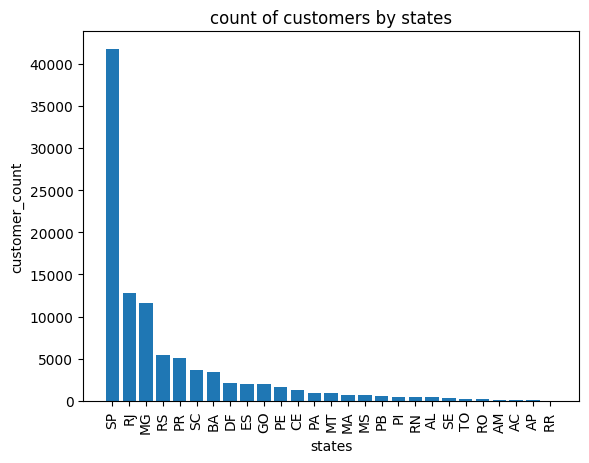

In [86]:
# 6. Count the number of customers from each state. 
import pyodbc 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  
cursor = conn.cursor()

query = """ select customer_state as state, count(customer_id) as count from customers
group by customer_state 
"""
cursor.execute(query)
data = cursor.fetchall()

for row in data:
    print(row[0], row[1])

df = pd.read_sql(query, conn)
print(df)
df=df.sort_values(by="count", ascending=False)
plt.bar(df["state"], df["count"])
plt.xticks(rotation =90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("count of customers by states")
plt.show()

conn.close()

1 7269
2 6728
3 7211
4 6939
5 6873
6 6167
7 6292
8 6512
9 16
10 4


C:\Users\Ashish\AppData\Local\Temp\ipykernel_5476\4264753649.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   month_num  order_count
0          1         7269
1          2         6728
2          3         7211
3          4         6939
4          5         6873
5          6         6167
6          7         6292
7          8         6512
8          9           16
9         10            4


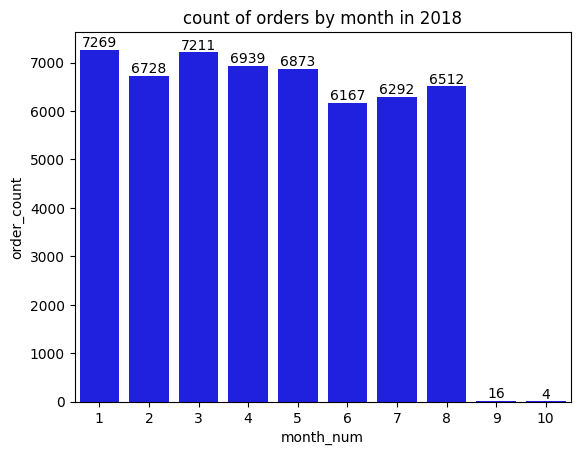

In [94]:
# 7. Calculate the number of orders per month in 2018.

import pyodbc 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  
cursor = conn.cursor()

query = """ select month(order_purchase_timestamp) as month_num, count(order_id) as order_count from orders
where year(order_purchase_timestamp)=2018
group by  month(order_purchase_timestamp)"""
cursor.execute(query)
data = cursor.fetchall()

for row in data:
    print(row[0], row[1])
    
df = pd.read_sql(query, conn)
print(df)

df=df.sort_values(by="order_count", ascending=False)
ax= sns.barplot(x= df["month_num"], y= df["order_count"], data=df, color="blue")
ax.bar_label(ax.containers[0])
plt.title("count of orders by month in 2018")

plt.show()

conn.close()

In [6]:
# 8. Find the average number of products per order, grouped by customer city.

import pyodbc 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  
cursor = conn.cursor()



query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id) 

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders 
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""
cursor.execute(query)
data = cursor.fetchall()

for row in data:
    (row[0], row[1])
    
df = pd.read_sql(query, conn)
print(df.head(10))


C:\Users\Ashish\AppData\Local\Temp\ipykernel_18252\1565889092.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


        customer_city  average_orders
0      padre carvalho               7
1       candido godoi               6
2         celso ramos               6
3               datas               6
4      matias olimpio               5
5  morro de sao paulo               4
6          curralinho               4
7          cidelandia               4
8             picarra               4
9     teixeira soares               4


In [12]:
# 9.Calculate the percentage of total revenue contributed by each product category

import pyodbc 
import pandas as pd

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  

query = """
SELECT 
    UPPER(products.product_category) AS category, 
    ROUND((SUM(payments.payment_value)/(SELECT SUM(payment_value) FROM payments))*100, 2) AS sales_percentage
FROM products 
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY UPPER(products.product_category) 
ORDER BY sales_percentage DESC
"""

df = pd.read_sql(query, conn)
print(df.head(10))

conn.close()

C:\Users\Ashish\AppData\Local\Temp\ipykernel_18252\1533295509.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


               category  sales_percentage
0        BED TABLE BATH             10.70
1         HEALTH BEAUTY             10.35
2  COMPUTER ACCESSORIES              9.90
3       WATCHES PRESENT              8.93
4  FURNITURE DECORATION              8.93
5         SPORT LEISURE              8.70
6            HOUSEWARES              6.84
7            AUTOMOTIVE              5.32
8          GARDEN TOOLS              5.24
9            COOL STUFF              4.87


In [17]:
#10.Identify the correlation between product price and the number of times a product has been purchased.
import pyodbc 
import pandas as pd
import numpy as np

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  

query = """select products.product_category, 
count(order_items.product_id) as order_count,
round(avg(order_items.price),2) as price
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

df = pd.read_sql(query, conn)
print(df.head(10))

arr1 = df["order_count"]
arr2 = df["price"]
print()
a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

conn.close()

C:\Users\Ashish\AppData\Local\Temp\ipykernel_18252\2589382891.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


               product_category  order_count    price
0  Fashion Bags and Accessories         2031    75.25
1                  Market Place          311    91.25
2                         foods          510    57.63
3                           PCs          203  1098.34
4                     telephony         4545    71.21
5              Furniture office         1691   162.01
6      Construction Tools Tools          103   154.41
7                 House comfort          434   134.96
8        Fashion Men's Clothing          132    81.80
9                 climatization          297   185.27

the correlation is -0.10631514167157564


C:\Users\Ashish\AppData\Local\Temp\ipykernel_18252\2902540296.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


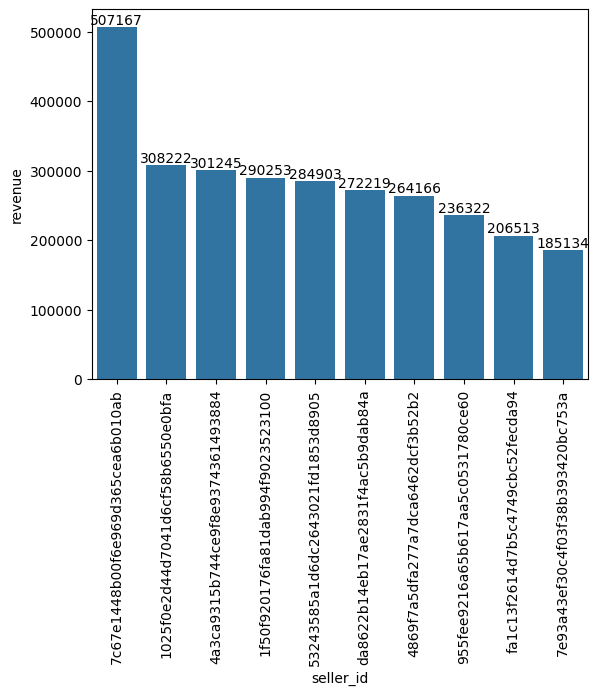

In [22]:
#11.Calculate the total revenue generated by each seller, and rank them by revenue.
import pyodbc 
import pandas as pd
import seaborn as sns

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  

query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

df = pd.read_sql(query, conn)
df=df.head(10)
ax=sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

conn.close()

In [24]:
#12.Calculate the moving average of order values for each customer over their order history.
import pyodbc 
import pandas as pd
import seaborn as sns

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  

query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""

df = pd.read_sql(query, conn)
df=df.head(10)
print(df)

C:\Users\Ashish\AppData\Local\Temp\ipykernel_18252\2967943562.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


                        customer_id order_purchase_timestamp  payment  mov_avg
0  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   114.74
1  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32    67.41    67.41
2  0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43   195.42   195.42
3  0002414f95344307404f0ace7a26f1d5      2017-08-16 13:09:20   179.35   179.35
4  000379cdec625522490c315e70c7a9fb      2018-04-02 13:42:17   107.01   107.01
5  0004164d20a9e969af783496f3408652      2017-04-12 08:35:12    71.80    71.80
6  000419c5494106c306a97b5635748086      2018-03-02 17:47:40    49.40    49.40
7  00046a560d407e99b969756e0b10f282      2017-12-18 11:08:30   166.59   166.59
8  00050bf6e01e69d5c0fd612f1bcfb69c      2017-09-17 16:04:44    85.23    85.23
9  000598caf2ef4117407665ac33275130      2018-08-11 12:14:35  1255.71  1255.71


In [28]:
#13.Calculate the cumulative sales per month for each year.

import pyodbc 
import pandas as pd

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  

query = """
SELECT 
    years, 
    months, 
    monthly_payment,
    SUM(monthly_payment) OVER(PARTITION BY years ORDER BY months) AS cumulative_sales
FROM 
    (SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        MONTH(orders.order_purchase_timestamp) AS months,
        ROUND(SUM(payments.payment_value), 2) AS monthly_payment 
     FROM orders 
     JOIN payments ON orders.order_id = payments.order_id
     GROUP BY YEAR(orders.order_purchase_timestamp), MONTH(orders.order_purchase_timestamp)
    ) AS monthly_sales
ORDER BY years, months
"""

df = pd.read_sql(query, conn)
print(df)
conn.close()

C:\Users\Ashish\AppData\Local\Temp\ipykernel_18252\2779776805.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


    years  months  monthly_payment  cumulative_sales
0    2016       9           252.24            252.24
1    2016      10         59090.48          59342.72
2    2016      12            19.62          59362.34
3    2017       1        138488.04         138488.04
4    2017       2        291908.01         430396.05
5    2017       3        449863.60         880259.65
6    2017       4        417788.03        1298047.68
7    2017       5        592918.82        1890966.50
8    2017       6        511276.38        2402242.88
9    2017       7        592382.92        2994625.80
10   2017       8        674396.32        3669022.12
11   2017       9        727762.45        4396784.57
12   2017      10        779677.88        5176462.45
13   2017      11       1194882.80        6371345.25
14   2017      12        878401.48        7249746.73
15   2018       1       1115004.18        1115004.18
16   2018       2        992463.34        2107467.52
17   2018       3       1159652.12        3267

In [42]:

#14.Calculate the year-over-year growth rate of total sales.

import pyodbc 
import pandas as pd

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  

query = """
WITH yearly_sales AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        ROUND(SUM(payments.payment_value), 2) AS payment 
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY YEAR(orders.order_purchase_timestamp)
)
SELECT 
    years, 
    payment,
    CASE 
        WHEN LAG(payment, 1) OVER(ORDER BY years) = 0 THEN NULL
        WHEN LAG(payment, 1) OVER(ORDER BY years) IS NULL THEN NULL
        ELSE ROUND(
            ((payment - LAG(payment, 1) OVER(ORDER BY years)) / 
              LAG(payment, 1) OVER(ORDER BY years)) * 100, 2)
    END AS yoy_growth_percent
FROM yearly_sales
ORDER BY years
"""

try:
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    
    # Print column headers
    print("Year\tPayment\tYoY Growth %")
    print("----------------------------")
    
    for row in data:
        year = row[0]
        payment = row[1]
        growth = row[2] if row[2] is not None else "N/A"
        print(f"{year}\t{payment}\t{growth}")
        
except pyodbc.Error as e:
    print(f"SQL Error: {e}")
finally:
    conn.close()


Year	Payment	YoY Growth %
----------------------------
2016	59362.34	N/A
2017	7249746.73	12112.7
2018	8699763.05	20.0


In [47]:
#15.Calculate the retention rate of customers, defined as the percentage of customers who make another
#purchase within 6 months of their first purchase.

import pyodbc 
import pandas as pd

conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)                                  

query = """
WITH first_orders AS (
    SELECT 
        customer_id,
        MIN(order_purchase_timestamp) AS first_order
    FROM orders
    GROUP BY customer_id
),
repeat_orders AS (
    SELECT 
        o.customer_id
    FROM orders o
    JOIN first_orders f ON o.customer_id = f.customer_id
    WHERE 
        o.order_purchase_timestamp > f.first_order AND
        o.order_purchase_timestamp <= DATEADD(MONTH, 6, f.first_order)
)
SELECT 
    CAST(COUNT(DISTINCT r.customer_id) AS FLOAT) * 100.0 / COUNT(DISTINCT f.customer_id) AS retention_rate_percent
FROM first_orders f
LEFT JOIN repeat_orders r ON f.customer_id = r.customer_id;
"""

df = pd.read_sql(query, conn)
print(df)
conn.close()


C:\Users\Ashish\AppData\Local\Temp\ipykernel_18252\2326206895.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   retention_rate_percent
0                     0.0


C:\Users\Ashish\AppData\Local\Temp\ipykernel_18252\736716823.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


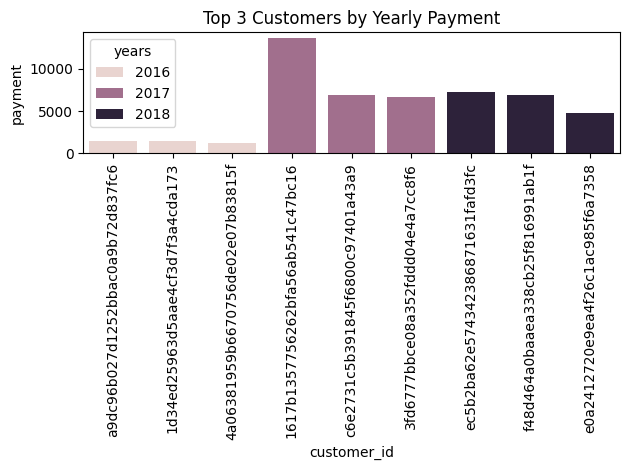

In [48]:
#16.Identify the top 3 customers who spent the most money in each year.

import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connection setup
conn = pyodbc.connect( 
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-1DF1PLG\\SQLEXPRESS;'
    'DATABASE=ecommerce;'
    'Trusted_Connection=yes;'
)

query = """
SELECT years, customer_id, payment, d_rank
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        orders.customer_id,
        SUM(payments.payment_value) AS payment,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(orders.order_purchase_timestamp)
            ORDER BY SUM(payments.payment_value) DESC
        ) AS d_rank
    FROM orders
    JOIN payments ON payments.order_id = orders.order_id
    GROUP BY YEAR(orders.order_purchase_timestamp), orders.customer_id
) AS a
WHERE d_rank <= 3;
"""

# Read into DataFrame directly
df = pd.read_sql(query, conn)
conn.close()

# Plot
sns.barplot(x="customer_id", y="payment", data=df, hue="years")
plt.xticks(rotation=90)
plt.title("Top 3 Customers by Yearly Payment")
plt.tight_layout()
plt.show()

